## Model Evaluation

In [ ]:
import pandas as pd
import joblib
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

model_path = "../Model-training/bertopic_model_multi.pkl"
# topic_model = joblib.load(model_path)
with open(model_path, 'rb') as file:
    topic_model = pickle.load(file)

df = pd.read_csv("../Model-training/topic_modeling_results_multi_allenai.csv")

topics = df["topics"].unique()
topics = [topic for topic in topics if topic != -1] # Menghilangkan topik -1 (noise)

# Mendapatkan kata-kata utama dari setiap topik
topic_words = {topic: topic_model.get_topic(topic) for topic in topics}
topic_word_list = [[word for word, _ in topic_words[topic]] for topic in topic_words]

/home/rochmanu02/.conda/envs/gugugaga_env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
df.head()

,Judul,topics,probabilities
0,interactive mixed reality system pepper ghost ...,22,0.650337
1,optimasi penjadwalan mata pelajaran metode tab...,38,0.880422
2,pengembangan push notification websocket,33,1.000000
3,pembangunan sistem informasi manajemen keluhan...,0,1.000000
4,implementasi metode store and forward hypertex...,68,0.573599


In [9]:
num_outliers = (df["topics"] == -1).sum()
print(f"Jumlah judul dengan topic -1: {num_outliers}")

Jumlah judul dengan topic -1: 1360


In [10]:
topic_model.get_topic(-1)

[('analisis', np.float64(0.006623777509834838)),
 ('user', np.float64(0.006455530592181671)),
 ('aplikasi', np.float64(0.006299481960435299)),
 ('berbasis', np.float64(0.006273734233254401)),
 ('usability', np.float64(0.006122129976983096)),
 ('metode', np.float64(0.006022223062941791)),
 ('sistem', np.float64(0.005952772343316921)),
 ('pengguna', np.float64(0.005857880551625154)),
 ('pengembangan', np.float64(0.005776366336078993)),
 ('website', np.float64(0.005713855270502305))]

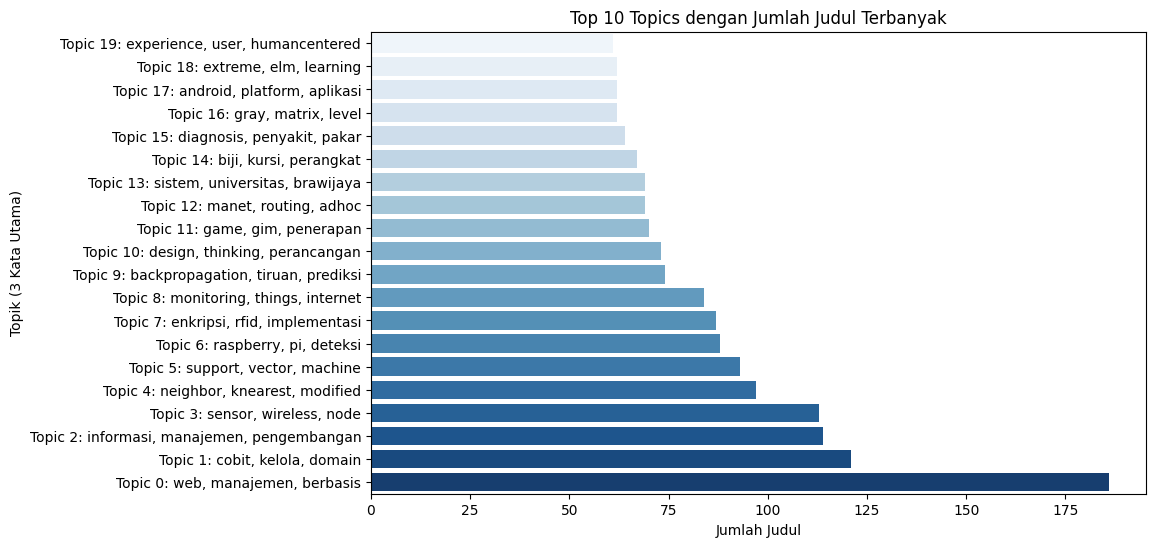

In [11]:
# Hitung jumlah judul per topik
df2 = df[df["topics"] != -1]
topic_counts = df2["topics"].value_counts().reset_index()
topic_counts.columns = ["Topic", "Count"]

# Ambil top 10 topik dengan jumlah judul terbanyak
top_10_topics = topic_counts.nlargest(20, "Count")

# Ambil 3 kata utama per topik untuk label
top_10_topics["Label"] = [
    f"Topic {topic_id}: " + ", ".join([word for word, _ in topic_model.get_topic(topic_id)][:3])  # ID + 3 kata utama
    for topic_id in top_10_topics["Topic"]
]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_topics, x="Count", y="Label", palette="Blues_r")
plt.xlabel("Jumlah Judul")
plt.ylabel("Topik (3 Kata Utama)")
plt.title("Top 10 Topics dengan Jumlah Judul Terbanyak")
plt.gca().invert_yaxis()
plt.show()